<div style="background-color:#22bddf;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        EMPLOYEE ATTRITION PREDICTION                                                                
    </h2>
</div>

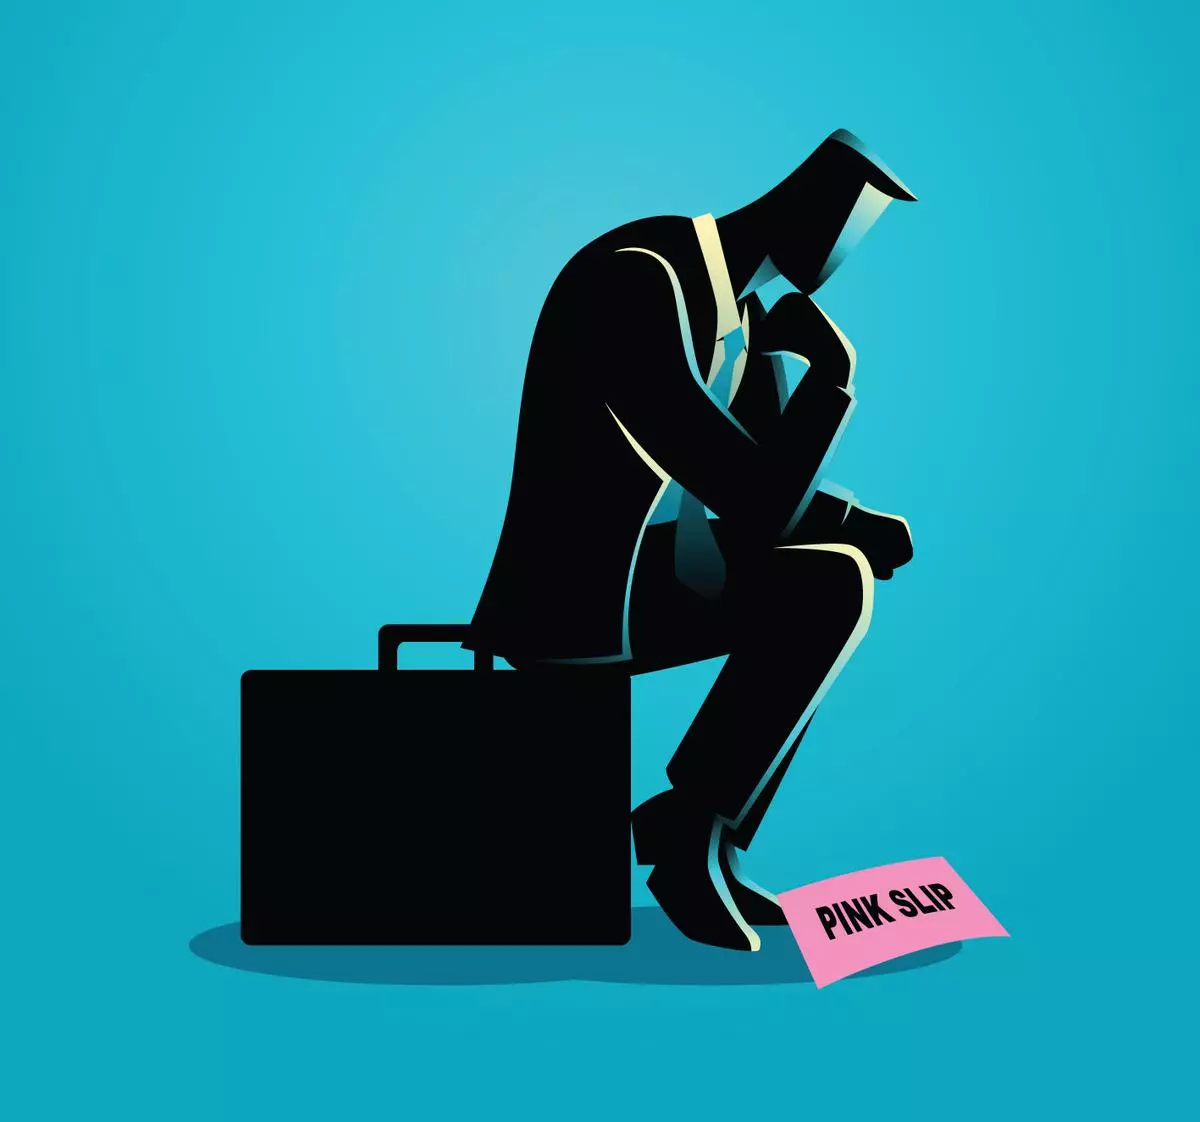

In this notebook, I will predict attrition of employees by 34 observable depending features

we can classify it in to two groups :YES , NO

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Importing the Dependencies
    </h2>
</div>

In [38]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Read Data from csv
    </h2>
</div>

In [39]:
data = pd.read_csv("HR-Employee-Attrition.csv")

In [40]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [41]:
data.shape

(1470, 35)

**NOTE:** **DATASET CONTAINS 1470 ROWS AND 35 COLUMNS**

In [42]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Note**:There are no null values so we do not need to handle it.


In [43]:
data.EmployeeCount.value_counts()


1    1470
Name: EmployeeCount, dtype: int64

In [44]:
data.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [45]:

data.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [35]:
data.EmployeeNumber.value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

We found that the above 3 columns have only same value repeating 1470 times in each colums..So its better to remove the columns     **[EmployeeCount,Over18,StandardHours]**    for better result 
Also removed **EmployeeNumber** .Because it doesnt effect the result

In [46]:
data.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours',"EmployeeNumber"], inplace = True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [53]:
new_data = pd.get_dummies(data, drop_first = True)
new_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [54]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [57]:
x = new_data.drop(columns = ['Attrition_Yes']) 
y = new_data['Attrition_Yes']

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
xcolumns = x.columns

In [61]:
scaled_x = scaler.fit_transform(x)

In [62]:
scaled_x = pd.DataFrame(scaled_x, columns = xcolumns)

In [63]:
scaled_x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y, test_size = 0.3, random_state = 100)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [68]:
y_pred = lr.predict(x_test)
print("Accuracy score of our model is :", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix is :\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification report is:\n ", metrics.classification_report(y_test, y_pred))
logisticscore = cross_val_score(lr, x_train, y_train, scoring="accuracy").mean()
print("Cross Validation Score is:", logisticscore)

Accuracy score of our model is : 0.8684807256235828
Confusion matrix is :
 [[352  19]
 [ 39  31]]
Classification report is:
                precision    recall  f1-score   support

           0       0.90      0.95      0.92       371
           1       0.62      0.44      0.52        70

    accuracy                           0.87       441
   macro avg       0.76      0.70      0.72       441
weighted avg       0.86      0.87      0.86       441

Cross Validation Score is: 0.8863035756571158


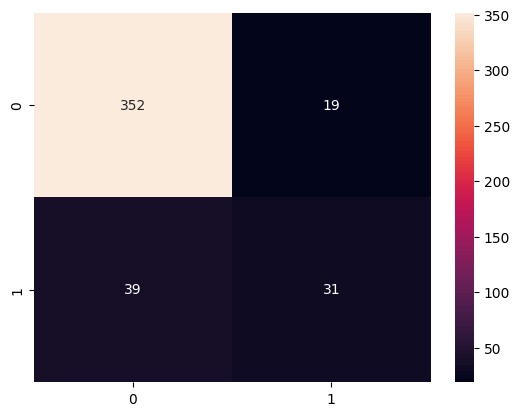

In [69]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
model = RandomForestClassifier()
params = {'n_estimators':[16,32,50,100],'max_depth':[0.5,1,5,10],'random_state':[1,10,20,42],
          'n_jobs':[1,2]}
gsc = GridSearchCV(model, params, scoring = 'accuracy')
gsc.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [0.5, 1, 5, 10],
                         'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],
                         'random_state': [1, 10, 20, 42]},
             scoring='accuracy')

In [72]:
print("Best estimator is: ", gsc.best_estimator_)
print("Best parameters are: ", gsc.best_params_)
print("Best score is: ",gsc.best_score_)

Best estimator is:  RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)
Best parameters are:  {'max_depth': 10, 'n_estimators': 32, 'n_jobs': 1, 'random_state': 20}
Best score is:  0.8561733364906464


In [73]:
model = gsc.best_estimator_
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)

In [74]:
prediction = model.predict(x_test)
print("Accuracy score is" ,metrics.accuracy_score(prediction, y_test))
print("Confusion metrics:\n" ,metrics.confusion_matrix(prediction,y_test))
print("Classification report:\n", metrics.classification_report(prediction,y_test))
rfscore = cross_val_score(model, x_train,y_train, scoring= "accuracy").mean()
print("Cross val score: ", rfscore)

Accuracy score is 0.8571428571428571
Confusion metrics:
 [[368  60]
 [  3  10]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       428
           1       0.14      0.77      0.24        13

    accuracy                           0.86       441
   macro avg       0.57      0.81      0.58       441
weighted avg       0.97      0.86      0.90       441

Cross val score:  0.8561733364906464


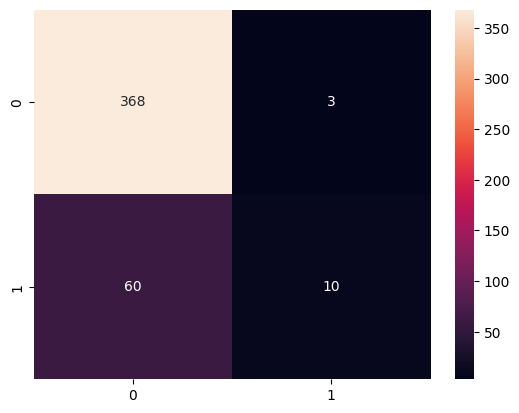

In [75]:
sns.heatmap(metrics.confusion_matrix(y_test,prediction), annot = True, fmt = 'd')
plt.show()

### SVM

In [76]:
from sklearn.svm import SVC

params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
          'degree': [3, 4, 5]}
model = SVC()
gsc = GridSearchCV(model, params)
gsc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [77]:
print("Best estimator is: ", gsc.best_estimator_)
print("Best parameters are: ", gsc.best_params_)
print("Best score is: ",gsc.best_score_)

Best estimator is:  SVC(C=0.95, kernel='sigmoid')
Best parameters are:  {'C': 0.95, 'degree': 3, 'kernel': 'sigmoid'}
Best score is:  0.877565711579446


In [78]:
model = gsc.best_estimator_
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print("Accuracy score is" ,metrics.accuracy_score(prediction, y_test))
print("Confusion metrics:\n" ,metrics.confusion_matrix(prediction,y_test))
print("Classification report:\n", metrics.classification_report(prediction,y_test))
svmscore = cross_val_score(model, x_train,y_train, scoring= "accuracy").mean()
print("Cross val score: ", svmscore)

Accuracy score is 0.8662131519274376
Confusion metrics:
 [[363  51]
 [  8  19]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.92       414
           1       0.27      0.70      0.39        27

    accuracy                           0.87       441
   macro avg       0.62      0.79      0.66       441
weighted avg       0.94      0.87      0.89       441

Cross val score:  0.877565711579446


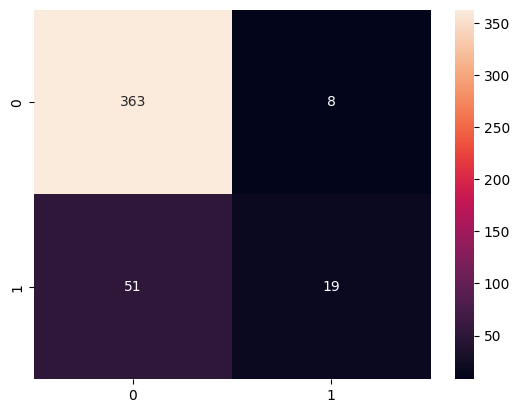

In [79]:
sns.heatmap(metrics.confusion_matrix(y_test,prediction), annot = True, fmt = 'd')
plt.show()

### AdaBoost Classifier

In [80]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train,y_train)
prediciton = model.predict(x_test)

print("Accuracy score is" ,metrics.accuracy_score(prediction, y_test))
print("Confusion metrics:\n" ,metrics.confusion_matrix(prediction,y_test))
print("Classification report:\n", metrics.classification_report(prediction,y_test))
gradientscore = cross_val_score(model, x_train,y_train, scoring= "accuracy").mean()
print("Cross val score: ", gradientscore)

Accuracy score is 0.8662131519274376
Confusion metrics:
 [[363  51]
 [  8  19]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.92       414
           1       0.27      0.70      0.39        27

    accuracy                           0.87       441
   macro avg       0.62      0.79      0.66       441
weighted avg       0.94      0.87      0.89       441

Cross val score:  0.8610419133317546


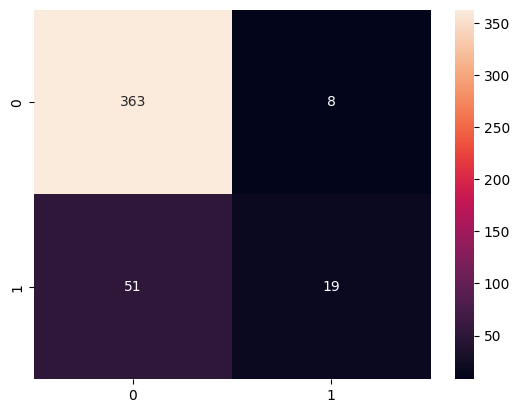

In [81]:
sns.heatmap(metrics.confusion_matrix(y_test,prediction), annot = True, fmt = 'd')
plt.show()

In [82]:
models = pd.DataFrame({'Models':['Random Forest Classifier','Logistic Regression', 
                                 'Gradient Boost Classifier', 'Support Vector Classifier'],
                      'Score':[rfscore, logisticscore,gradientscore,svmscore]})
models.sort_values(by='Score', ascending = False)

,Models,Score
1,Logistic Regression,0.886304
3,Support Vector Classifier,0.877566
2,Gradient Boost Classifier,0.861042
0,Random Forest Classifier,0.856173


In [83]:
# Use PCA to reduce dimensionality of the data

# Import PCA and fit our X_train

In [84]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(x_train)

PCA(n_components=0.95)

In [85]:
# Apply the mapping (transform) to both the training set and the test set.

In [86]:
train_x = pca.transform(x_train)
test_x = pca.transform(x_test)

In [87]:
# Import machine learning model of our choice, we are going with RandomForest for this problem

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model = RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)
model.fit(train_x, y_train)

RandomForestClassifier(max_depth=10, n_estimators=32, n_jobs=1, random_state=20)

In [90]:
model.score(train_x, y_train)

0.9737609329446064

In [91]:
y_pred = model.predict(test_x)
print("Accuracy Score is :", metrics.accuracy_score(y_test, y_pred))

Accuracy Score is : 0.8526077097505669


In [92]:
print("Confusion matrix is :\n", metrics.confusion_matrix(y_test,y_pred))

Confusion matrix is :
 [[369   2]
 [ 63   7]]


In [93]:
print("Classification report is :\n", metrics.classification_report(y_test,y_pred))

Classification report is :
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       371
           1       0.78      0.10      0.18        70

    accuracy                           0.85       441
   macro avg       0.82      0.55      0.55       441
weighted avg       0.84      0.85      0.80       441

